# Models to estimate specified quantiles instead of mean 

There are number of real world use cases where instead of estimating `mean` using mse, we would like to know the quantiles.

Definition of Quantile :

The word “quantile” comes from the word quantity. In simple terms, a quantile is where a sample data is divided into equal-sized groups. So a 50% quantile means, half of the population is below *X* and hals if above. 
    


In [59]:
import pandas as pd 
import datarobot as dr
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

![Quantile distribution](img/image1.png)

In [4]:
data = pd.read_csv('mcycle.csv')

In [18]:
data.drop(data.columns[0], axis=1)

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


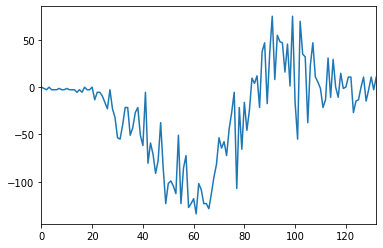

In [6]:
data['accel'].plot()

In [32]:
t_test = np.linspace(data.times.min(),data.times.max(),200)
t_test = t_test.reshape(-1,1)

# OLS

In [28]:
# OLS 
X = data.times.values.reshape(-1,1)
y = data.accel.values.reshape(-1,1)

In [29]:
reg = LinearRegression().fit(X, y)

In [34]:
y_test = reg.predict(t_test)

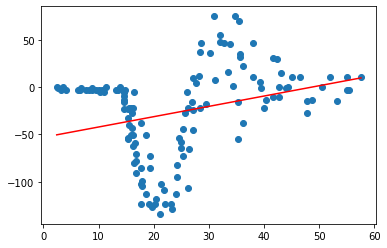

In [35]:
plt.scatter(data.times,data.accel)
plt.plot(t_test, y_test,'r')
plt.show()

# Tree based model with Quantile loss at 0.95

In [51]:
def build_estimator(alpha,X,y, t_test):
    a = alpha
    clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
    clf.fit(X, y)
    y_test = clf.predict(t_test)
    return y_test

In [52]:
nine_five = build_estimator(0.95, X, y, t_test)

/opt/anaconda3/envs/datarobot/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
median = build_estimator(0.50, X, y, t_test)

/opt/anaconda3/envs/datarobot/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
zero_five = build_estimator(0.05, X, y, t_test)

/opt/anaconda3/envs/datarobot/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


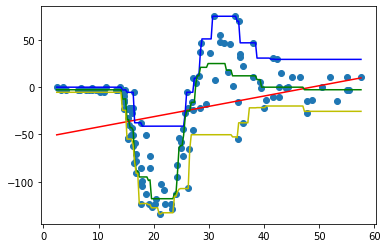

In [58]:
plt.scatter(data.times,data.accel)
plt.plot(t_test, y_test,'r')
plt.plot(t_test, nine_five,'b')
plt.plot(t_test, median,'g')
plt.plot(t_test, zero_five,'y')
plt.show()